> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate the film table

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Accouding to the head of the table, there are some questions I want to know.
1. What kinds of properties are associated with movies that have high revenues?
2. What kinds of properties are associated with movies that make more money?

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [3]:
def standardize(df):
    std = df.std(ddof=0)
    mean = df.mean(axis='index')
    return (df.sub(mean,axis='columns')).div(std,axis='columns')

In [4]:
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

**We first standardize the data from the table to make the exploring job easier.**

In [47]:
# Problem 1:What kinds of properties are associated with movies that have high revenues?
# I guess the budget, release year, average vote and the runtime are relation with the revenue.
# I need to Standarize and then calculate the correlation.
movies_df_clear = movies_df[(movies_df['revenue'] != 0)&(movies_df['budget'] != 0)]

movies_revenue_budget = standardize(movies_df_clear[['revenue','budget']]) # The data of budget and the revenue

movies_revenue_year = standardize(movies_df_clear[['revenue','release_year']]) # The data of year and the reveneue 

movies_revenue_vote = standardize(movies_df_clear[['revenue','vote_average']]) # The data of vote_average and the reveneue

movies_revenue_runtime = standardize(movies_df_clear[['revenue','runtime']]) # The data of runtime and the reveneue

In [48]:
# Problem 2:What kinds of properties are associated with movies that make more money?
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df[["profit"]] = movies_df[["profit"]].astype(int)
# There are some movies that do not releast the data of budget and revenue of the movie.
# In that case, I need to drop these data.
movies_df_clear = movies_df[(movies_df['revenue'] != 0)&(movies_df['budget'] != 0)]

movies_profit_budget = standardize(movies_df_clear[['profit','budget']]) # The data of budget and the profit

movies_profit_year = standardize(movies_df_clear[['profit','release_year']]) # The data of year and the profit

movies_profit_vote = standardize(movies_df_clear[['profit','vote_average']]) # The data of vote_average and the profit

movies_profit_runtime = standardize(movies_df_clear[['profit','runtime']]) # The data of runtime and the profit

In [49]:
movies_df_clear.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline     ...     runtime  \
0              The park is open.     ...         124   
1             What a Lovely Day.     ...         120   
2     One Choice Can Destroy You     ...         119   
3  Every generation has a story.     ...         136   
4            Vengeance Hits Home     ...         137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

  vote_average  release_year    budget_adj   revenue_adj      profit  
0          6.5          2015  1.379999e+08  1.392446e+09  1363528810  
1          7.1          2015  1.379999e+08  3.481613e+08   228436354  
2          6.3          2015  1.012000e+08  2.716190e+08   185238201  
3          7.5          2015  1.839999e+08  1.902723e+09  1868178225  
4          7.3          2015  1.747999e+08  1.385749e+09  1316249360  

[5 rows x 22 columns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ：What kinds of properties are associated with movies that have high revenues?

     I calculate the correlation of the data that I think make efforts with the revenue in the standardize data tables.

In [50]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
print(correlation(movies_revenue_budget['revenue'],movies_revenue_budget['budget']))
print(correlation(movies_revenue_year['revenue'],movies_revenue_year['release_year']))
print(correlation(movies_revenue_vote['revenue'],movies_revenue_vote['vote_average']))
print(correlation(movies_revenue_runtime['revenue'],movies_revenue_runtime['runtime']))

0.6885476775894025
0.13900076266812664
0.22727883053553416
0.2503977834291769


As the correlations of the data show above, the budget is most correlate with the revenue. 

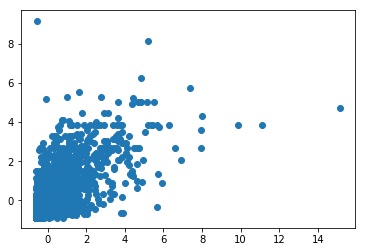

In [51]:
plt.scatter(movies_revenue_budget['revenue'],movies_revenue_budget['budget'])

The figure shows that if the movie has more budget, it will probably has more revenue.

### Research Question 2  ：What kinds of properties are associated with movies that make more money?

In [8]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
print(movies_df_clear['profit'].describe())
print(movies_df_clear['profit'].count())

count    3.855000e+03
mean     6.934298e+07
std      1.481682e+08
min     -1.750461e+09
25%     -1.328516e+06
50%      2.000010e+07
75%      8.152590e+07
max      1.868178e+09
Name: profit, dtype: float64
3855


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   3.20000000e+01,   3.25000000e+02,
        

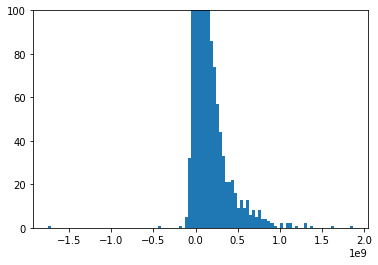

In [78]:
plt.ylim(0,100)
plt.hist(movies_df_clear['profit'], bins=100)

In [ ]:
I change the Y limit of the figure because most of the movies make little money.
Only one movie losts huge money, about 1.750461e+09 and a few movies make huge money.

In [80]:
print(correlation(movies_profit_budget['profit'],movies_profit_budget['budget']))
print(correlation(movies_profit_year['profit'],movies_profit_year['release_year']))
print(correlation(movies_profit_vote['profit'],movies_profit_vote['vote_average']))
print(correlation(movies_profit_runtime['profit'],movies_profit_runtime['runtime']))

0.49988402575670243
0.08411494743360505
0.25505671307332783
0.20405352358103343


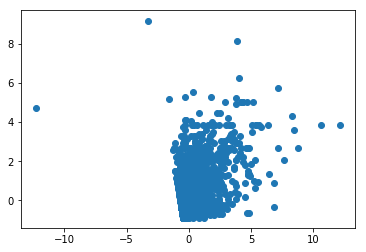

In [81]:
plt.scatter(movies_profit_budget['profit'],movies_profit_budget['budget'])

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

After analisis the given data, I can have the conclusions:
1. Movies that have high revenues usually have more budget.
2. Movies that make more money usually have more budget
3. Most of the movies given in the table make no money or make little money.